<a href="https://colab.research.google.com/github/jjschueder/7331DataMiningNotebooks/blob/master/Mini-Project%20SVMLR%20Classification/(V2)Mini-Project%20SVMLR%20Classification-with%20SGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini-Project: SVM&LR Classification
You are to perform predictive analysis (classification) upon a data set: model the dataset using
methods we have discussed in class: logistic regression & support vector machines and making
conclusions from the analysis. Follow the CRISP-DM framework in your analysis (you are not
performing all of the CRISP-DM outline, only the portions relevant to the grading rubric outlined
below). This report is worth 10% of the final grade. You may complete this assignment in teams
of as many as three people.
Write a report covering all the steps of the project. The format of the document can be PDF,
*.ipynb, or HTML. You can write the report in whatever format you like, but it is easiest to turn in
the rendered Jupyter notebook. The results should be reproducible using your report. Please
carefully describe every assumption and every step in your report.
A note on grading: A common mistake I see in this lab is not investigating different input
parameters for each model. Try a number of parameter combinations and discuss how the model changed. 

## SVM and Logistic Regression Modeling


### Create Models [50 points] 
Create a logistic regression model and a support vector machine model for the
classification task involved with your dataset. Assess how well each model performs (use
80/20 training/testing split for your data). Adjust parameters of the models to make them
more accurate. If your dataset size requires the use of stochastic gradient descent, then
linear kernel only is fine to use. That is, the SGDClassifier is fine to use for optimizing
logistic regression and linear support vector machines. For many problems, SGD will be
required in order to train the SVM model in a reasonable timeframe.   

### Load and Clean Data Set

In [0]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt
from sklearn.model_selection import ShuffleSplit
from sklearn import metrics 
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedShuffleSplit 
from sklearn.linear_model import SGDClassifier

In [0]:
#read data from github repository
#this data was produced from the Iowa Alcohol Dataset 2019 year data
#It was cleansed and transformed in this notebook and exported as a csv to github for use here.
#source python notebook: https://github.com/jjschueder/7331DataMiningNotebooks/blob/master/lab1/msds7331_clark_schueder_vela_washburn.ipynb
# read csv from github directly
url_dataset = 'https://raw.githubusercontent.com/jjschueder/7331DataMiningNotebooks/master/Live%20Assignments/df1hotmerge2.csv'
#data = pd.read_csv(url_dataset)
data = pd.read_csv(url_dataset, nrows=100000)

In [3]:
print(data.shape)
print(list(data.columns))

(100000, 68)
['Unnamed: 0', 'pack', 'bottle_volume_ml', 'state_bottle_cost', 'state_bottle_retail', 'bottles_sold', 'sale_dollars', 'volume_sold_liters', 'volume_sold_gallons', 'counter', 'liquor_category', 'store_parent', 'month', 'year', 'monthyear', 'liquor_category_AMARETTO', 'liquor_category_BRANDY', 'liquor_category_GIN', 'liquor_category_LIQUEUR', 'liquor_category_Other', 'liquor_category_RUM', 'liquor_category_SCHNAPPS', 'liquor_category_TEQUILA', 'liquor_category_VODKA', 'liquor_category_WHISKY', 'store_parent_CVS', 'store_parent_Caseys', 'store_parent_Hy-Vee', 'store_parent_Kum&Go', 'store_parent_Other', 'store_parent_QuikTrip', 'store_parent_SamsClub', 'store_parent_SmokingJoes', 'store_parent_Target', 'store_parent_Wal-Mart', 'store_parent_Walgreens', 'month_Apr', 'month_Aug', 'month_Dec', 'month_Feb', 'month_Jan', 'month_Jul', 'month_Jun', 'month_Mar', 'month_May', 'month_Nov', 'month_Oct', 'month_Sep', 'year_2019', 'monthyear_Apr-2019', 'monthyear_Aug-2019', 'monthyear_De

In [4]:
#data = data.drop(columns = ['Unnamed: 0'])
count_not_whiskey = len(data[data['liquor_category_WHISKY']==0])
count_whiskey = len(data[data['liquor_category_WHISKY']==1])
pct_of_no_whiskey = count_not_whiskey/(count_not_whiskey+count_whiskey)
print("percentage of not whiskey is", pct_of_no_whiskey*100)
pct_of_whiskey = count_whiskey/(count_not_whiskey+count_whiskey)
print("percentage of whiskey", pct_of_whiskey*100)

percentage of not whiskey is 77.35499999999999
percentage of whiskey 22.645


In [5]:
cat_vars=['counter', 'liquor_category', 'store_parent',
 'month', 'year', 'monthyear', 'liquor_category_AMARETTO', 'liquor_category_BRANDY', 'liquor_category_GIN', 
 'liquor_category_LIQUEUR', 'liquor_category_Other', 'liquor_category_RUM', 'liquor_category_SCHNAPPS', 
 'liquor_category_TEQUILA', 'liquor_category_VODKA', 'month_Apr', 'month_Aug', 'month_Dec', 'month_Feb',
 'month_Jan', 'month_Jul', 'month_Jun', 'month_Mar', 'month_May', 'month_Nov', 'month_Oct', 'month_Sep', 
 'store_parent_CVS', 'store_parent_Caseys', 'store_parent_Hy-Vee', 'store_parent_Kum&Go', 
 'store_parent_Other', 'store_parent_QuikTrip', 'store_parent_SamsClub', 'store_parent_SmokingJoes', 
 'store_parent_Target', 'store_parent_Wal-Mart', 'store_parent_Walgreens']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]
to_keep=['sale_dollars_trans', 'cost_per_liter_trans',
      'state_bottle_cost_trans', 'bottles_sold_trans',
       'volume_sold_liters_trans','pack', 'bottle_volume_ml',
       'liquor_category_WHISKY']
data_final=data[to_keep]
data_final.columns.values

array(['sale_dollars_trans', 'cost_per_liter_trans',
       'state_bottle_cost_trans', 'bottles_sold_trans',
       'volume_sold_liters_trans', 'pack', 'bottle_volume_ml',
       'liquor_category_WHISKY'], dtype=object)

In [49]:
data_final.info

<bound method DataFrame.info of        sale_dollars_trans  ...  liquor_category_WHISKY
0                4.750136  ...                       0
1                2.574900  ...                       0
2                5.000585  ...                       0
3                6.636261  ...                       1
4                5.121819  ...                       0
...                   ...  ...                     ...
99995            4.948760  ...                       0
99996            4.948760  ...                       0
99997            4.948760  ...                       0
99998            4.948760  ...                       0
99999            4.948760  ...                       0

[100000 rows x 8 columns]>

In [0]:
X = data_final.loc[:, data_final.columns != 'liquor_category_WHISKY']
y = data_final.loc[:, data_final.columns == 'liquor_category_WHISKY']

In [7]:
X.head()

,sale_dollars_trans,cost_per_liter_trans,state_bottle_cost_trans,bottles_sold_trans,volume_sold_liters_trans,pack,bottle_volume_ml
0,4.750136,2.735233,1.348073,2.995732,2.014903,20,375
1,2.574900,5.570632,2.169054,0.000000,-2.995732,8,50
2,5.000585,3.208825,2.803360,1.791759,1.791759,12,1000
3,6.636261,3.745890,3.052585,3.178054,2.890372,6,750
4,5.121819,2.077296,2.231089,2.484907,3.044522,6,1750


## Logistic Regression

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
columns = X_train.columns


from sklearn.linear_model import LogisticRegression
# all parameters not specified are set to their defaults
simplelogisticRegr = LogisticRegression()# class_weight = 'balanced')

simplelogisticRegr.fit(X_train, y_train)

coef = simplelogisticRegr.coef_[0]
classes = simplelogisticRegr.classes_[0]
intercept = simplelogisticRegr.intercept_[0]
print (coef)

print (intercept)

predictions = simplelogisticRegr.predict(X_test)

params =simplelogisticRegr.get_params(deep=True)
print (params)

# Use score method to get accuracy of model
score = simplelogisticRegr.score(X_test, y_test)
print("Accuracy: ", '\n', score)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predictions)
print("Confusion Matrix: ", '\n', cm)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[ 0.34603289 -0.55706816  2.25561124 -1.30490151  0.90310105 -0.04838378
 -0.00437401]
-1.4442094973385553
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Accuracy:  
 0.84375
Confusion Matrix:  
 [[14282  1244]
 [ 1881  2593]]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [10]:
predictions = simplelogisticRegr.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[14282  1244]
 [ 1881  2593]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90     15526
           1       0.68      0.58      0.62      4474

    accuracy                           0.84     20000
   macro avg       0.78      0.75      0.76     20000
weighted avg       0.84      0.84      0.84     20000



We ran a "simple" logistic regression model using the default hyper parameters of C=1.0, no weighting of the classes and with a ridge regression penalty. 

As a result, our model achieved 84% accuracy which is a bit higher than the accuracy we would achieve if we were to guess randomly based on the distribution of whiskies vs non whiskies. From here, we can use a grid search procedure to tune our hyper parameters to improve our accuracy score. 

### Models Using Grid Search to compare best possible model

In [0]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
#columns = X_train.columns
# scale attributes by the training set
scl_obj = StandardScaler()
scl_obj.fit(X_train) # find scalings for each column that make this zero mean and unit std
# the line of code above only looks at training data to get mean and std and we can use it 
# to transform new feature data

X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test)

In [10]:
#Logisitic regression 10-fold cross-validation 

#Divide data into test and training splits
cv = ShuffleSplit(n_splits=10, test_size=0.10, random_state=0)

regEstimator = LogisticRegression()


parameters = { 'penalty':['l2', 'l1', 'elasticnet']
              ,'C': [0.001, 1, 10, 100]
              ,'class_weight': ['balanced', 'none']
              ,'random_state': [0]
              ,'solver': ['lbfgs', 'saga', 'liblinear', 'newton-cg', 'sag']
              ,'max_iter':[100]
             }

#Create a grid search object using the  

regGridSearch = GridSearchCV(estimator=regEstimator
                   , n_jobs=8 # jobs to run in parallel
                   , verbose=1 # low verbosity
                   , param_grid=parameters
                   , cv=cv # KFolds = 10
                   , scoring='accuracy')

#Perform hyperparameter search to find the best combination of parameters for our data
regGridSearch.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   17.4s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:   35.5s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:  4.5min
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed: 11.6min
[Parallel(n_jobs=8)]: Done 1200 out of 1200 | elapsed: 18.9min finished
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=0, test_size=0.1, train_size=None),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=8,
             param_grid={'C': [0.001, 1, 10, 100],
                         'class_weight': ['balanced', 'none'],
                         'max_iter': [100],
                         'penalty': ['l2', 'l1', 'elasticnet'],
                         'random_state': [0],
  

In [12]:
#Diplay the top model parameters
regGridSearch.best_estimator_

LogisticRegression(C=0.001, class_weight='none', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

After running our grid search, we found that the ideal model uses a C=0.001 which is different from our default model of C=1.0. Otherwise, the other parameters remained the same. 

Let's see how this does with our accuracy score. 

In [13]:
type(regGridSearch)

sklearn.model_selection._search.GridSearchCV

In [0]:
gridresults = pd.DataFrame(regGridSearch.cv_results_)

In [0]:
columns = ['param_solver','param_C', 'param_max_iter', 'class_weight', 'param_penalty', 'mean_test_score', 'rank_test_score']
gridresults = pd.DataFrame(gridresults, columns=columns)

In [16]:
gridresults.sort_values(by=['rank_test_score'], ascending=True).head(20)

,param_solver,param_C,param_max_iter,class_weight,param_penalty,mean_test_score,rank_test_score
19,sag,0.001,100,NaN,l2,0.838012,1
18,newton-cg,0.001,100,NaN,l2,0.838000,2
16,saga,0.001,100,NaN,l2,0.838000,2
15,lbfgs,0.001,100,NaN,l2,0.838000,2
21,saga,0.001,100,NaN,l1,0.835500,5
46,saga,1,100,NaN,l2,0.831275,6
51,saga,1,100,NaN,l1,0.831263,7
49,sag,1,100,NaN,l2,0.831263,7
48,newton-cg,1,100,NaN,l2,0.831263,7
45,lbfgs,1,100,NaN,l2,0.831263,7


In [17]:
y_hat = regGridSearch.predict(X_test_scaled) # get test set precitions

# now let's get the accuracy and confusion matrix for this iterations of training/testing
acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)

print("accuracy", acc )
print("confusion matrix\n",conf)

accuracy 0.83965
confusion matrix
 [[14901   625]
 [ 2582  1892]]


In [19]:
predictions2 = regGridSearch.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_hat))
print(classification_report(y_test, y_hat))

[[14901   625]
 [ 2582  1892]]
              precision    recall  f1-score   support

           0       0.85      0.96      0.90     15526
           1       0.75      0.42      0.54      4474

    accuracy                           0.84     20000
   macro avg       0.80      0.69      0.72     20000
weighted avg       0.83      0.84      0.82     20000



After running a grid search to uncover the top performing logistic regression hyperparameter combination, we are seeing that the accuracy score is close to our simple logistic regression model, however, it did come in slightly lower. 

The Simple Logistic Regression model was the winner with a C=1 which is less regularization than the grid search that called for a stronger regularization at C = 0.001. 

ROC Curves and AUC in Python
https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/

Since our accuracy was better was the better with our logistic regression model, we will use this in building an ROC curve to show how our model is performing. 

In [23]:
# predict probabilities
lr_probs = simplelogisticRegr.predict_proba(X_test_scaled)
ns_probs = [0 for _ in range(len(y_test))]
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.813


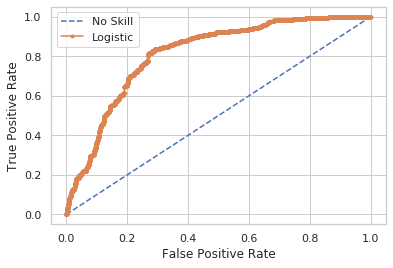

In [24]:
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

Looking at our true positive rate compared to false positive rate, with the diagonal line representing a 50% false positive rate, we can see that our model is producing more True positives than false positives. 

In [0]:
ywhiskcnt = y_test.apply(pd.value_counts)
ycnt = ywhiskcnt.loc[1:1, :]

Logistic: f1=0.541 auc=0.504


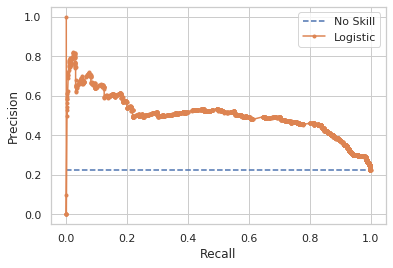

In [26]:
# predict probabilities
lr_probs = simplelogisticRegr.predict_proba(X_test_scaled)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = regGridSearch.predict(X_test_scaled)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
ywhiskcnt = y_test.apply(pd.value_counts)
ycnt = ywhiskcnt.loc[1:1, :]
no_skill = ycnt.values[0] / len(y_test)
#no_skill = len(y_test[y_test==1]) / len(y_test)
no_skill
#no_skill = 0.2
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

Running a Precision/ Recall line plot, we can see that our model tends to lose precision as we get a higher recall, with the bottoming out of 0.5 precision and 0.2 being the point of spiking the performance. 

So essentially, it is saying that our model is better at predicting the correct line items that were whiskies than correctly discerning between whiskies and non whiskies. 

#### Support Vector Machine Model 1:

In [12]:
%%time

#possibility to scale it?
from sklearn.svm import LinearSVC
from sklearn import preprocessing
X_train_scaled 
X_test_scaled 
#X_train = preprocessing.scale(X_train)
#X_test = preprocessing.scale(X_test)

# all parameters not specified are set to their defaults
#https://stackabuse.com/implementing-svm-and-kernel-svm-with-pythons-scikit-learn/
from sklearn.svm import SVC
#svclassifier = SVC(kernel='poly', degree=8)
#svclassifier = SVC(kernel='rbf')
#svclassifier = SVC(kernel='linear', C = 1000, random_state=0)
svclassifier = LinearSVC(C=100)
model = svclassifier.fit(X_train_scaled,  y_train)
model

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CPU times: user 18.3 s, sys: 0 ns, total: 18.3 s
Wall time: 18.4 s


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [13]:
# Returns a NumPy Array
predictions = svclassifier.predict(X_test_scaled)
from sklearn.metrics import classification_report, confusion_matrix
print("confusion matrix\n")
print(confusion_matrix(y_test, predictions))
print("\nClassification report\n")
print(classification_report(y_test, predictions))
acc = mt.accuracy_score(y_test,predictions)
print("\naccuracy\n", acc )


confusion matrix

[[14747   779]
 [ 2525  1949]]

Classification report

              precision    recall  f1-score   support

           0       0.85      0.95      0.90     15526
           1       0.71      0.44      0.54      4474

    accuracy                           0.83     20000
   macro avg       0.78      0.69      0.72     20000
weighted avg       0.82      0.83      0.82     20000


accuracy
 0.8348


For our Support Vector Machine, we were able to derive an 83% Accuracy with a precision of 85% and Recall of 95%. 



[[-0.61775368 -0.30898634  1.40374172  0.60365598 -0.31869447  0.27247933
  -0.35229276]]


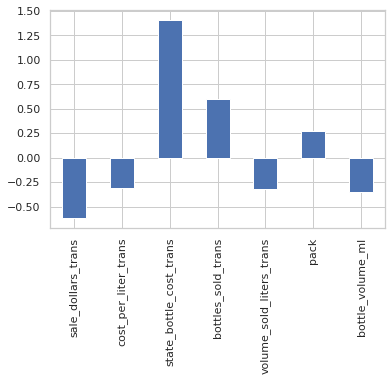

In [19]:
# if using linear kernel, these make sense to look at (not otherwise, why?)
print(svclassifier.coef_)
weights = pd.Series(svclassifier.coef_[0],index=X.columns)
weights.plot(kind='bar')

Looking at the key values associated with driving the prediction classifier of whiskey vs non whiskey, we can see that the state bottle cost is the key factor in driving performance, followed by the sale amount of the transation which has a negative relationship to whether or not a sale was a whiskey.

#### SVM Classifier 2 (with Hyper Parameter Tuning)

In [38]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# scale attributes by the training set
scl_obj = StandardScaler()
scl_obj.fit(X_train) # find scalings for each column that make this zero mean and unit std
# the line of code above only looks at training data to get mean and std and we can use it 
# to transform new feature data

X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test)

# train the model just as before
svm_clf = SVC(C=0.5, kernel='rbf', degree=3, gamma='auto') # get object
model3 = svm_clf.fit(X_train_scaled, y_train)  # train object
model3

y_hat = svm_clf.predict(X_test_scaled) # get test set precitions

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf)

accuracy: 0.87355
[[14485  1041]
 [ 1488  2986]]


In [16]:
print("\nClassification report SVM Model 2 \n")
print(classification_report(y_test,y_hat))


Classification report SVM Model 2 

              precision    recall  f1-score   support

           0       0.91      0.93      0.92     15526
           1       0.74      0.67      0.70      4474

    accuracy                           0.87     20000
   macro avg       0.82      0.80      0.81     20000
weighted avg       0.87      0.87      0.87     20000



With SVM Model 2, we attain the highest accuracy score with 87%, with alos the highest precision, recall and F1 Score achieved with our model. The SVM CLF will be the model we chose in our interpretation. 

In [17]:
# look at the support vectors
print(svm_clf.support_vectors_.shape)
print(svm_clf.support_.shape)
print(svm_clf.n_support_ )

(24104, 7)
(24104,)
[12107 11997]


So the analysis here is basically telling us what the original statistics of the data looked like, and also what the statistics of the support vectors looked like. We can see that the separation in distributions is not as great as the separation for the original data. This is because the support vectors tend to be instances on the edge of the class boundaries and also instances that are classified incorrectly in the training data.

You can also look at joint plots of the data and see how relationships have changed.

### SGD ("Simple" Model)

In [26]:
%%time
# now divide the data into test and train using scikit learn built-ins

cv = StratifiedShuffleSplit( n_splits=1,test_size=0.8)
# use some compact notation for creating a linear SVM classifier with stochastic descent

regularize_const = 0.1
iterations = 5

# use some compact notation for creating a logistic regression classifier with stochastic descent
log_sgd = SGDClassifier(alpha=regularize_const,
        fit_intercept=True, l1_ratio=0.0, learning_rate='optimal',
        loss='log', n_iter_no_change=iterations, n_jobs=-1, penalty='l2')

scl = StandardScaler()

CPU times: user 1.36 ms, sys: 0 ns, total: 1.36 ms
Wall time: 4.46 ms


In [30]:
for train_idx, test_idx in cv.split(X,y):
    log_sgd.fit(scl.fit_transform(X.iloc[train_idx]),y.iloc[train_idx])
    yhat2 = log_sgd.predict(scl.transform(X.iloc[test_idx]))
    
    conf = mt.confusion_matrix(y.iloc[test_idx],yhat2)
    acc = mt.accuracy_score(y.iloc[test_idx],yhat2)

print('Logistic Regression:', acc)

Logistic Regression: 0.8074125


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [31]:
conf

array([[60702,  1182],
       [14225,  3891]])

Of all our models, the SGD "simple" model had the worst accuracy score of 80%. 

### SGD 2 (with parameterization testing)

With this parameterization tuning set, we will run a hyper-parameter fitting model called Parfit. 

In [0]:
#pip install parfit

  Created wheel for parfit: filename=parfit-0.220-cp36-none-any.whl size=8660 sha256=9692a86beca86a6afc06600eb96cf9c599167d250045bf3923eb1119c6b6f205
  Stored in directory: /root/.cache/pip/wheels/d9/8a/c9/ed86e85ad0cb41ce2fdcb6bc215902dc475bd3fb1fef7c742d
Successfully built parfit


-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   17.6s
[Parallel(n_jobs=-1)]: Done   6 out of   8 | elapsed:   18.3s remaining:    6.1s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:   21.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:   21.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.1s finished


-------------SCORING MODELS-------------


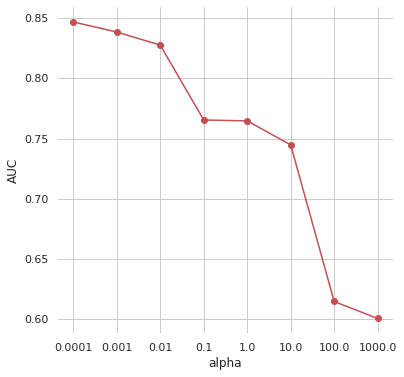

(SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=-1, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False), 0.84673776193031, [SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=-1, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False), SGDClassifier(alpha=0.001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True

In [33]:
from sklearn.model_selection import ParameterGrid
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import parfit.parfit as pf

grid = {
    'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3], # learning rate
   # 'n_iter': [1000], # number of epochs
    'loss': ['log'], # logistic regression,
    'penalty': ['l2'],
    'n_jobs': [-1]
}

paramGrid = ParameterGrid(grid)

bestModel = pf.bestFit(SGDClassifier, paramGrid,
           X_train, y_train, X_test, y_test, 
           metric = roc_auc_score, 
           scoreLabel = "AUC")

print(bestModel)

#Perform hyperparameter search to find the best combination of parameters for our data


In [0]:

# use some compact notation for creating a logistic regression classifier with stochastic descent
log_sgd2 = SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=-1, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [35]:
model2 = log_sgd2.fit(scl.fit_transform(X.iloc[train_idx]),y.iloc[train_idx])

for train_idx, test_idx in cv.split(X,y):
    log_sgd2.fit(scl.fit_transform(X.iloc[train_idx]),y.iloc[train_idx])
    yhat = log_sgd2.predict(scl.transform(X.iloc[test_idx]))
    
    conf = mt.confusion_matrix(y.iloc[test_idx],yhat)
    acc = mt.accuracy_score(y.iloc[test_idx],yhat)

print('Logistic Regression:', acc)
print('Confusion Matrix: ', conf)

Logistic Regression: 0.8522625
Confusion Matrix:  [[59177  2707]
 [ 9112  9004]]


After installing and running the Hyper-Parameter Optimization using parfit (https://towardsdatascience.com/how-to-make-sgd-classifier-perform-as-well-as-logistic-regression-using-parfit-cc10bca2d3c4), we can see that we improved upon our original Stochastic Gradient Descent Model with an accuracy score of 85.22%

This SGD and the Tuned SVM model will be the ones we use moving forward. 

### Advantages  [10 points] 
Discuss the advantages of each model for each classification task. Does one
type of model offer superior performance over another in terms of prediction accuracy? In
terms of training time or efficiency? Explain in detail. 

#### Logistic Regression
* Advantages - There is less transformation needed in order to make the model return in a reasonable amount of time. Scaler transformation will increase the accuracy, but is not required for peroformance as the model performs well at scale regardless of whether the data is normalized or not. 
* Performance - There are many different setting that allow the model to have the best possible accuracy. These methods can be iterated with a grid search method. 
*  Training Time efficiency is very good at large scales and does not suffer as volume of data increases.

#### Support Vector Machine
* Advantages - From Tan book Chapter 5 - A classification technique that has received considerable attention is support vector machine (SVM). This technique has its roots in statistical learning theory and has shown promising empirical results in many practical applications, from handwritten digit recognition to text categorization. SVM also works very well with high-dimensional data and avoids the curse of dimensionality problem. Another unique aspect of this approach is that it represents the decision boundary using a subset of the training examples, known as the support vectors.  
 However, in order to get high accuracy scaling and high penalties must be set to achieve accuracy with unbalanced data. 
* Performance - Changing the cost to value 1000, after previously using 1, 10, and 100 the performance of prediciton accuracy improves over that of logistic regession.  In order to get a result in a similiar amount of time as logistic regression accuracy is sacrficed. 
* Training Time
    * Slow with large data volume and features
    * Transformation of data helps
    * Very slow with high cost.

#### Stochastic Gradiant Descent
* Advantages - The design of Stochastic Gradient Smith is set up that it only considers a single randonm point in the stochastic array, and changes weights to classify values. The advantage of running stochastic gradient descent is that it runs much quicker than a gradient descent model, which can take hours / days to run. 
* Performance - While a single stochastic gradient descent model didn't perform better than any of the previous models we ran, we were able to install and run a Parameter Fit, which acted as a grid search to help us choose the optimal hyper parameters. Doing this improved our SGD performace to 83.5% accuracy. 
   
    

#### Conclusion
The logistic regression provides a way to quickly get to a model, though has less accuracy when compared to SVM.  SVM is very accurate while its performance degrades very quickly with large volumes of data with rows and also with a large number of features. 


###  Interpret  [30 points] 
Use the weights from logistic regression to interpret the importance of different
features for the classification task. Explain your interpretation in detail. Why do you think
some variables are more important? 

The two fields "Average of cost_per_liter_trans" and "Average of state_bottle_cost_trans" seem to have the highest coeficients on the logistic regression model. 

Type	     Average of cost_per_liter_trans	Average of state_bottle_cost_trans
Not Whiskey	 2.675545886	                    1.999205623
Whiskey      3.545918698	                    2.871239458

Add a t-test to show they are significantly different averages? 

The model seems to point out that price is the largest differentiator of the available characteristics. Whiskey is more expensive than other liquors. A higher cost per bottle can be used to identify whether a trancation was Whiskey or not. Other numeric features that are present represent bottle size and quanities of bottles sold. Since bottle sizes are fairly standard across the different types of liquors and quantity sold are well balanced across the liquor types and Whiskey is in the middle of the pack for these measures they do not have as much impact.

In [36]:
# interpret the weights
# iterate over the coefficients
weights2 = simplelogisticRegr.coef_.T # take transpose to make a column vector
variable_names = X.columns
for coef, name in zip(weights2,variable_names):
    print(name, 'has weight of', coef[0])
    
# does this look correct? 

sale_dollars_trans has weight of 0.34603288527153814
cost_per_liter_trans has weight of -0.5570681640419652
state_bottle_cost_trans has weight of 2.2556112412433813
bottles_sold_trans has weight of -1.3049015086027895
volume_sold_liters_trans has weight of 0.9031010497745309
pack has weight of -0.04838378311713963
bottle_volume_ml has weight of -0.004374009131824404


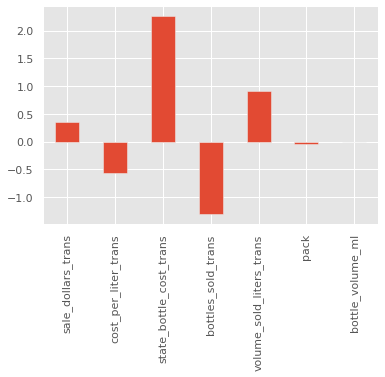

In [37]:
# now let's make a pandas Series with the names and values, and plot them
%matplotlib inline
plt.style.use('ggplot')


weights = pd.Series(simplelogisticRegr.coef_[0],index=X.columns)
weights.plot(kind='bar')
plt.show()

### Insight into the data [10 points]
Look at the chosen support vectors for the classification task. Do these provide
any insight into the data? Explain. If you used stochastic gradient descent (and therefore did
not explicitly solve for support vectors), try subsampling your data to train the SVC model—
then analyze the support vectors from the subsampled dataset. 

In [39]:
#view support vectors
svm_clf.support_vectors_

array([[ 0.04172852,  1.1229617 ,  1.28352278, ..., -0.66089127,
        -0.70389697, -0.26280584],
       [ 0.32837353,  0.21578964,  0.29396518, ...,  0.13752377,
        -0.70389697, -0.26280584],
       [ 0.68132163,  0.68644563,  0.80744936, ...,  0.13752377,
        -0.02330599, -0.26280584],
       ...,
       [-1.44503576, -0.85963717, -0.7941836 , ..., -0.66089127,
        -0.02330599, -0.26280584],
       [ 0.19106698, -0.7808375 , -0.7941836 , ...,  0.64126757,
        -0.02330599, -0.26280584],
       [ 0.68979404,  0.69774358,  0.81953947, ...,  0.13752377,
        -0.70389697, -0.26280584]])

In [40]:
# View indicies of support vectors
svm_clf.support_

array([    0,     8,     9, ..., 79976, 79984, 79987], dtype=int32)

This chooses all the misclassified items as a support vectors.

In [41]:
#view number of support vectors for each class
svm_clf.n_support_

array([12107, 11997], dtype=int32)

We used 12,000 instances of Whiskey and Nonwhiskey to build our decision boundary.

[[-0.61775368 -0.30898634  1.40374172  0.60365598 -0.31869447  0.27247933
  -0.35229276]]


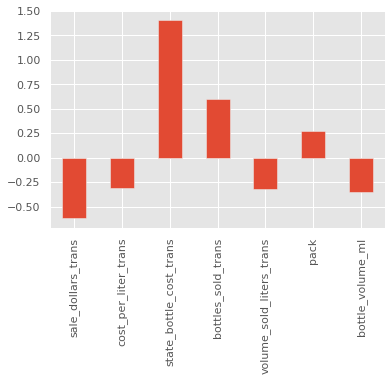

In [43]:
# if using linear kernel, these make sense to look at (not otherwise, why?)
print(model.coef_)
weights3 = pd.Series(model.coef_[0],index=X_train.columns)
weights3.plot(kind='bar')

Next we are going to make a stratified shuffle split by plotting our SVC models.

In [0]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import metrics as mt

# we want to predict the X and y data as follows:
if 'liquor_category_WHISKY' in data_final:
    y = data_final['liquor_category_WHISKY'].values # get the labels we want
    del data_final['liquor_category_WHISKY'] # get rid of the class label
    X = data_final.values # use everything else to predict!

num_cv_iterations = 3
num_instances = len(y)
cv_object = ShuffleSplit(n_splits = num_cv_iterations, 
                            test_size = 0.20, train_size = 0.80, random_state=1)

for train_indices, test_indices in cv_object.split(X,y): 
    # I will create new variables here so that it is more obvious what 
    # the code is doing (you can compact this syntax and avoid duplicating memory,
    # but it makes this code less readable)
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]

Now that we established our new training and testing indicies, let's run it against our top performing SVC CLF model (the one that got 87% accuracy).

In [48]:
# Now let's do some different analysis with the SVM and look at the instances that were chosen as support vectors

# now lets look at the support for the vectors and see if we they are indicative of anything
# grabe the rows that were selected as support vectors (these are usually instances that are hard to classify)

# make a dataframe of the training data
df_tested_on = data_final.iloc[train_indices].copy() # saved from above, the indices chosen for training
# now get the support vectors from the trained model
df_support = df_tested_on.iloc[svm_clf.support_,:]

df_support['liquor_category_WHISKY'] = y[svm_clf.support_] # add back in the 'Survived' Column to the pandas dataframe
data_final['liquor_category_WHISKY'] = y # also add it back in for the original data
df_support.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24104 entries, 9121 to 69667
Data columns (total 8 columns):
sale_dollars_trans          24104 non-null float64
cost_per_liter_trans        24104 non-null float64
state_bottle_cost_trans     24104 non-null float64
bottles_sold_trans          24104 non-null float64
volume_sold_liters_trans    24104 non-null float64
pack                        24104 non-null int64
bottle_volume_ml            24104 non-null int64
liquor_category_WHISKY      24104 non-null int64
dtypes: float64(5), int64(3)
memory usage: 1.7 MB


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Doing this granted us 24k non null values within what became our testing set. Using this, we will plot out the original vs the svm distribution of our state bottle cost trans, bottles sold trans, bottle volume ml and sale dollars trans, which was shown to be our strongest performing variables indicative of Whiskies vs Non Whiskies.

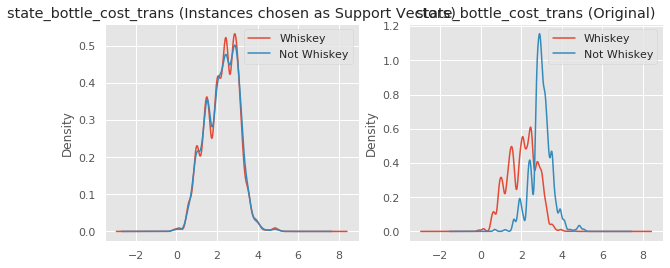

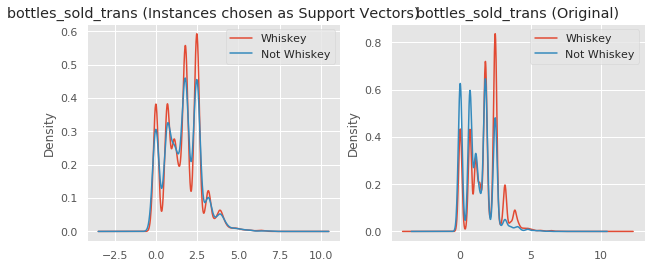

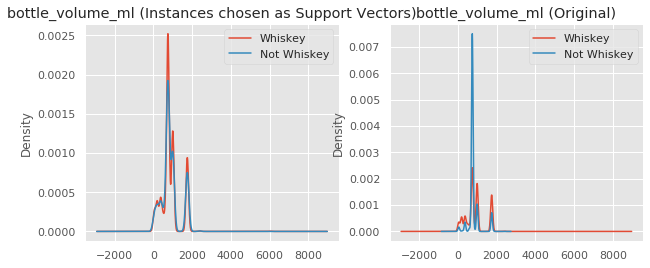

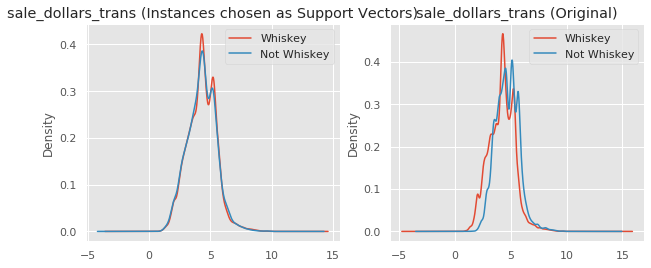

In [50]:
# now lets see the statistics of these attributes
from pandas.plotting import boxplot

# group the original data and the support vectors
df_grouped_support = df_support.groupby(['liquor_category_WHISKY'])
df_grouped = data_final.groupby(['liquor_category_WHISKY'])

# plot KDE of Different variables
vars_to_plot = ['state_bottle_cost_trans','bottles_sold_trans','bottle_volume_ml','sale_dollars_trans']

for v in vars_to_plot:
    plt.figure(figsize=(10,4))
    # plot support vector stats
    plt.subplot(1,2,1)
    ax = df_grouped_support[v].plot.kde() 
    plt.legend(['Whiskey','Not Whiskey'])
    plt.title(v+' (Instances chosen as Support Vectors)')
    
    # plot original distributions
    plt.subplot(1,2,2)
    ax = df_grouped[v].plot.kde() 
    plt.legend(['Whiskey','Not Whiskey'])
    plt.title(v+' (Original)')

By plotting our data density graphs next to one another, we can see the separation between distributions of the original data sets next to our support vector data on key variables, on the whiskey classifier. 

What we are looking for heere is the value of separation between what can be classified as a whiskey vs non whiskey (blue vs red lines). Since you can see that the separation on state bottle cost and the state bottle volume is more pronounced on the support vector model, this shows that they both play the most role in the prediction of whiskey. 

The other two variables, bottles sold and sale dollars, don't diverge as much between the original and SVM model, they are not as strong as predictors as the other two we discussed. And this is indicated on our weights we showed previously. 